In [38]:
import oceanspy as ospy
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import scipy as sp
import cmocean.cm as cmo

In [45]:
salinity = xr.open_dataset('C:/Users/eirik/Master/Data/salinity_vertical.nc')
depth = xr.open_dataset('C:/Users/eirik/Master/Data/depth.nc')

In [46]:
salinity = salinity['S']
depth = depth['Depth']

In [47]:
display(salinity)
display(depth)

<xarray.DataArray 'S' (time: 360, Z: 9, Y: 231, X: 524)>
[392182560 values with dtype=float64]
Coordinates:
  * Z        (Z) float64 -1.0 -3.5 -7.0 -11.5 -17.0 -23.5 -31.0 -39.5 -49.0
  * X        (X) float64 -24.98 -24.91 -24.85 ... -0.1493 -0.09658 -0.04373
  * Y        (Y) float64 70.01 70.03 70.04 70.06 ... 74.89 74.92 74.95 74.99
  * time     (time) datetime64[ns] 2018-01-01 ... 2018-03-31T18:00:00
Attributes:
    long_name:      salinity
    coordinates:    XC YC RC iter
    standard_name:  sea_water_salinity
    units:          g kg-1

<xarray.DataArray 'Depth' (Y: 628, X: 853)>
[535684 values with dtype=float64]
Coordinates:
  * X        (X) float64 -39.85 -39.69 -39.52 -39.37 ... 11.62 11.72 11.82 11.92
  * Y        (Y) float64 65.01 65.03 65.04 65.06 ... 78.67 78.75 78.83 78.92
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
Attributes:
    description:    fluid thickness in r coordinates (at rest)
    standard_name:  ocean_depth
    long_name:      ocean depth
    units:          m
    coordinate:     XC YC

Text(0.5, 1.0, 'Depth map')

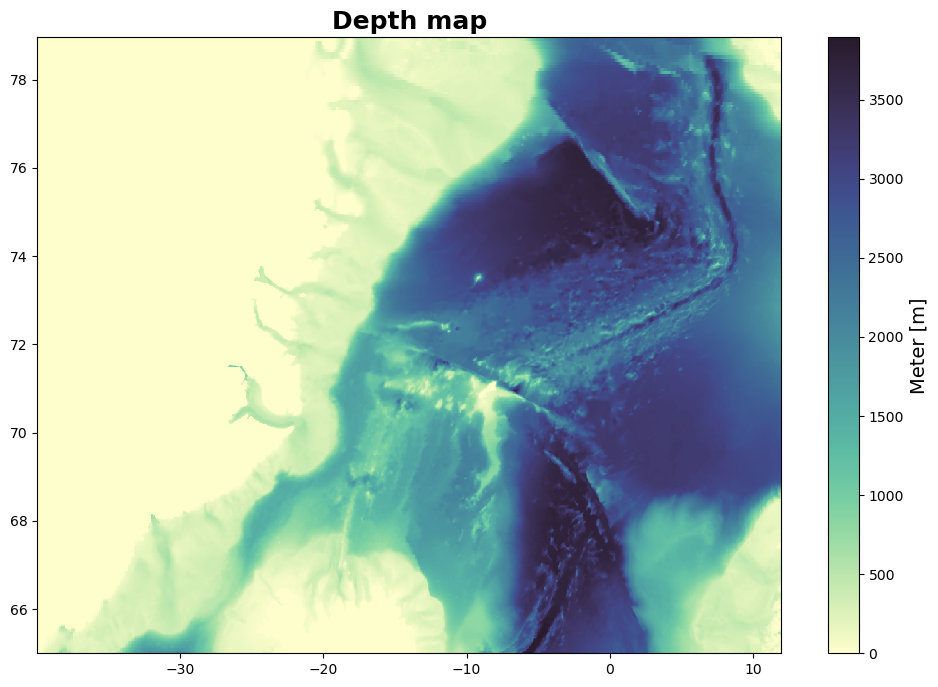

In [48]:
fig, ax = plt.subplots(figsize=[12,8])
mesh = ax.pcolor(depth.X,depth.Y,depth,cmap=cmo.deep)
cbar = fig.colorbar(mesh)
cbar.set_label('Meter [m]',fontsize=14)
ax.set_title('Depth map',fontweight='bold',fontsize=18)

C:\Users\eirik\AppData\Local\Temp\ipykernel_99164\2170502863.py:3: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(mesh)


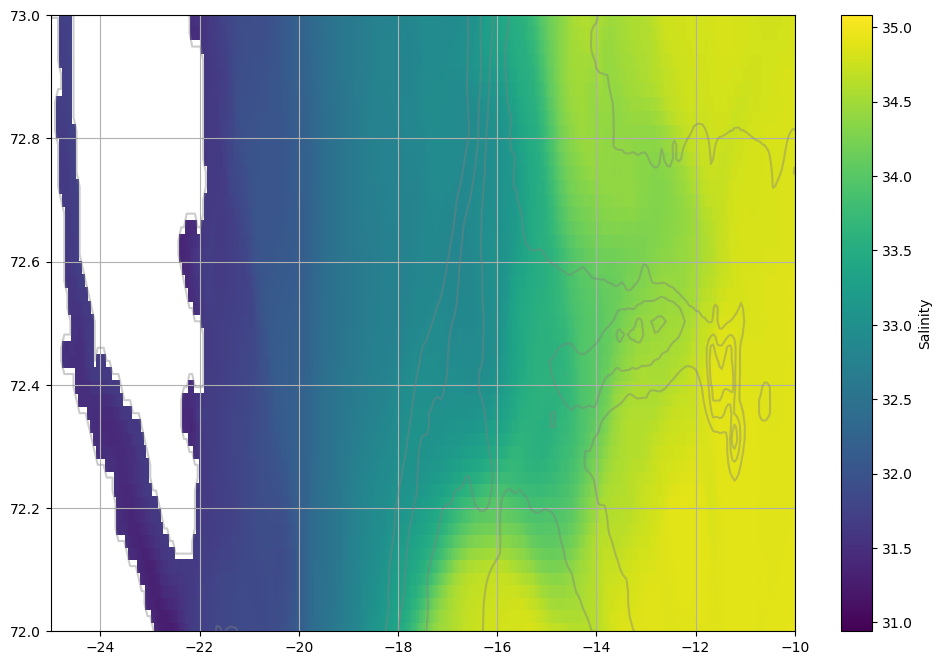

In [53]:
fig, ax = plt.subplots(figsize=[12,8])
mesh = ax.pcolor(salinity.X,salinity.Y,salinity[0][0])
cbar = fig.colorbar(mesh)
cbar.set_label('Salinity')
cntr = ax.contour(depth.X,depth.Y,depth,[0,500,1000,1500,2000,2500,3000],colors='grey',alpha=0.4)
ax.clabel(cntr, fmt="%2.1f", use_clabeltext=True)
ax.set_ylim(72,73)
ax.set_xlim(-25,-10)
ax.grid()

In [50]:
# Resample data into months
mean_salinity = salinity.mean(dim='time')
salinity = salinity.resample(time='1M').mean(dim='time')

c:\Users\eirik\anaconda3\envs\MSc_Env1\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


In [58]:
S = salinity.sel(Y=72.6,method='nearest')
display(S)

<xarray.DataArray 'S' (time: 3, Z: 9, X: 524)>
array([[[        nan,         nan,         nan, ..., 34.74518107,
         34.75030698, 34.75982294],
        [        nan,         nan,         nan, ..., 34.74531921,
         34.75045197, 34.76000135],
        [        nan,         nan,         nan, ..., 34.74546269,
         34.75060665, 34.76018426],
        ...,
        [        nan,         nan,         nan, ..., 34.74689425,
         34.75223948, 34.76168964],
        [        nan,         nan,         nan, ..., 34.75313489,
         34.75723288, 34.76277357],
        [        nan,         nan,         nan, ..., 34.7601498 ,
         34.76345027, 34.76520276]],

       [[        nan,         nan,         nan, ..., 34.89589922,
         34.90718958, 34.91658079],
        [        nan,         nan,         nan, ..., 34.89589339,
         34.90714817, 34.91652237],
        [        nan,         nan,         nan, ..., 34.8958291 ,
         34.9070448 , 34.91641245],
...
        [        nan,         nan,         nan, ..., 34.89595996,
         34.90690411, 34.91628595],
        [        nan,         nan,         nan, ..., 34.89605953,
         34.9069033 , 34.91634363],
        [        nan,         nan,         nan, ..., 34.89618648,
         34.90710585, 34.91654782]],

       [[        nan,         nan,         nan, ..., 34.9463943 ,
         34.94863413, 34.95138301],
        [        nan,         nan,         nan, ..., 34.94637473,
         34.94861926, 34.95136686],
        [        nan,         nan,         nan, ..., 34.94635666,
         34.94860929, 34.95135255],
        ...,
        [        nan,         nan,         nan, ..., 34.94605806,
         34.94831937, 34.95099242],
        [        nan,         nan,         nan, ..., 34.94586341,
         34.94808321, 34.9506901 ],
        [        nan,         nan,         nan, ..., 34.94562304,
         34.94772233, 34.95025309]]])
Coordinates:
  * Z        (Z) float64 -1.0 -3.5 -7.0 -11.5 -17.0 -23.5 -31.0 -39.5 -49.0
  * X        (X) float64 -24.98 -24.91 -24.85 ... -0.1493 -0.09658 -0.04373
    Y        float64 72.59
  * time     (time) datetime64[ns] 2018-01-31 2018-02-28 2018-03-31
Attributes:
    long_name:      salinity
    coordinates:    XC YC RC iter
    standard_name:  sea_water_salinity
    units:          g kg-1

C:\Users\eirik\AppData\Local\Temp\ipykernel_99164\321179560.py:3: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(mesh1)


(-25.0, -5.0)

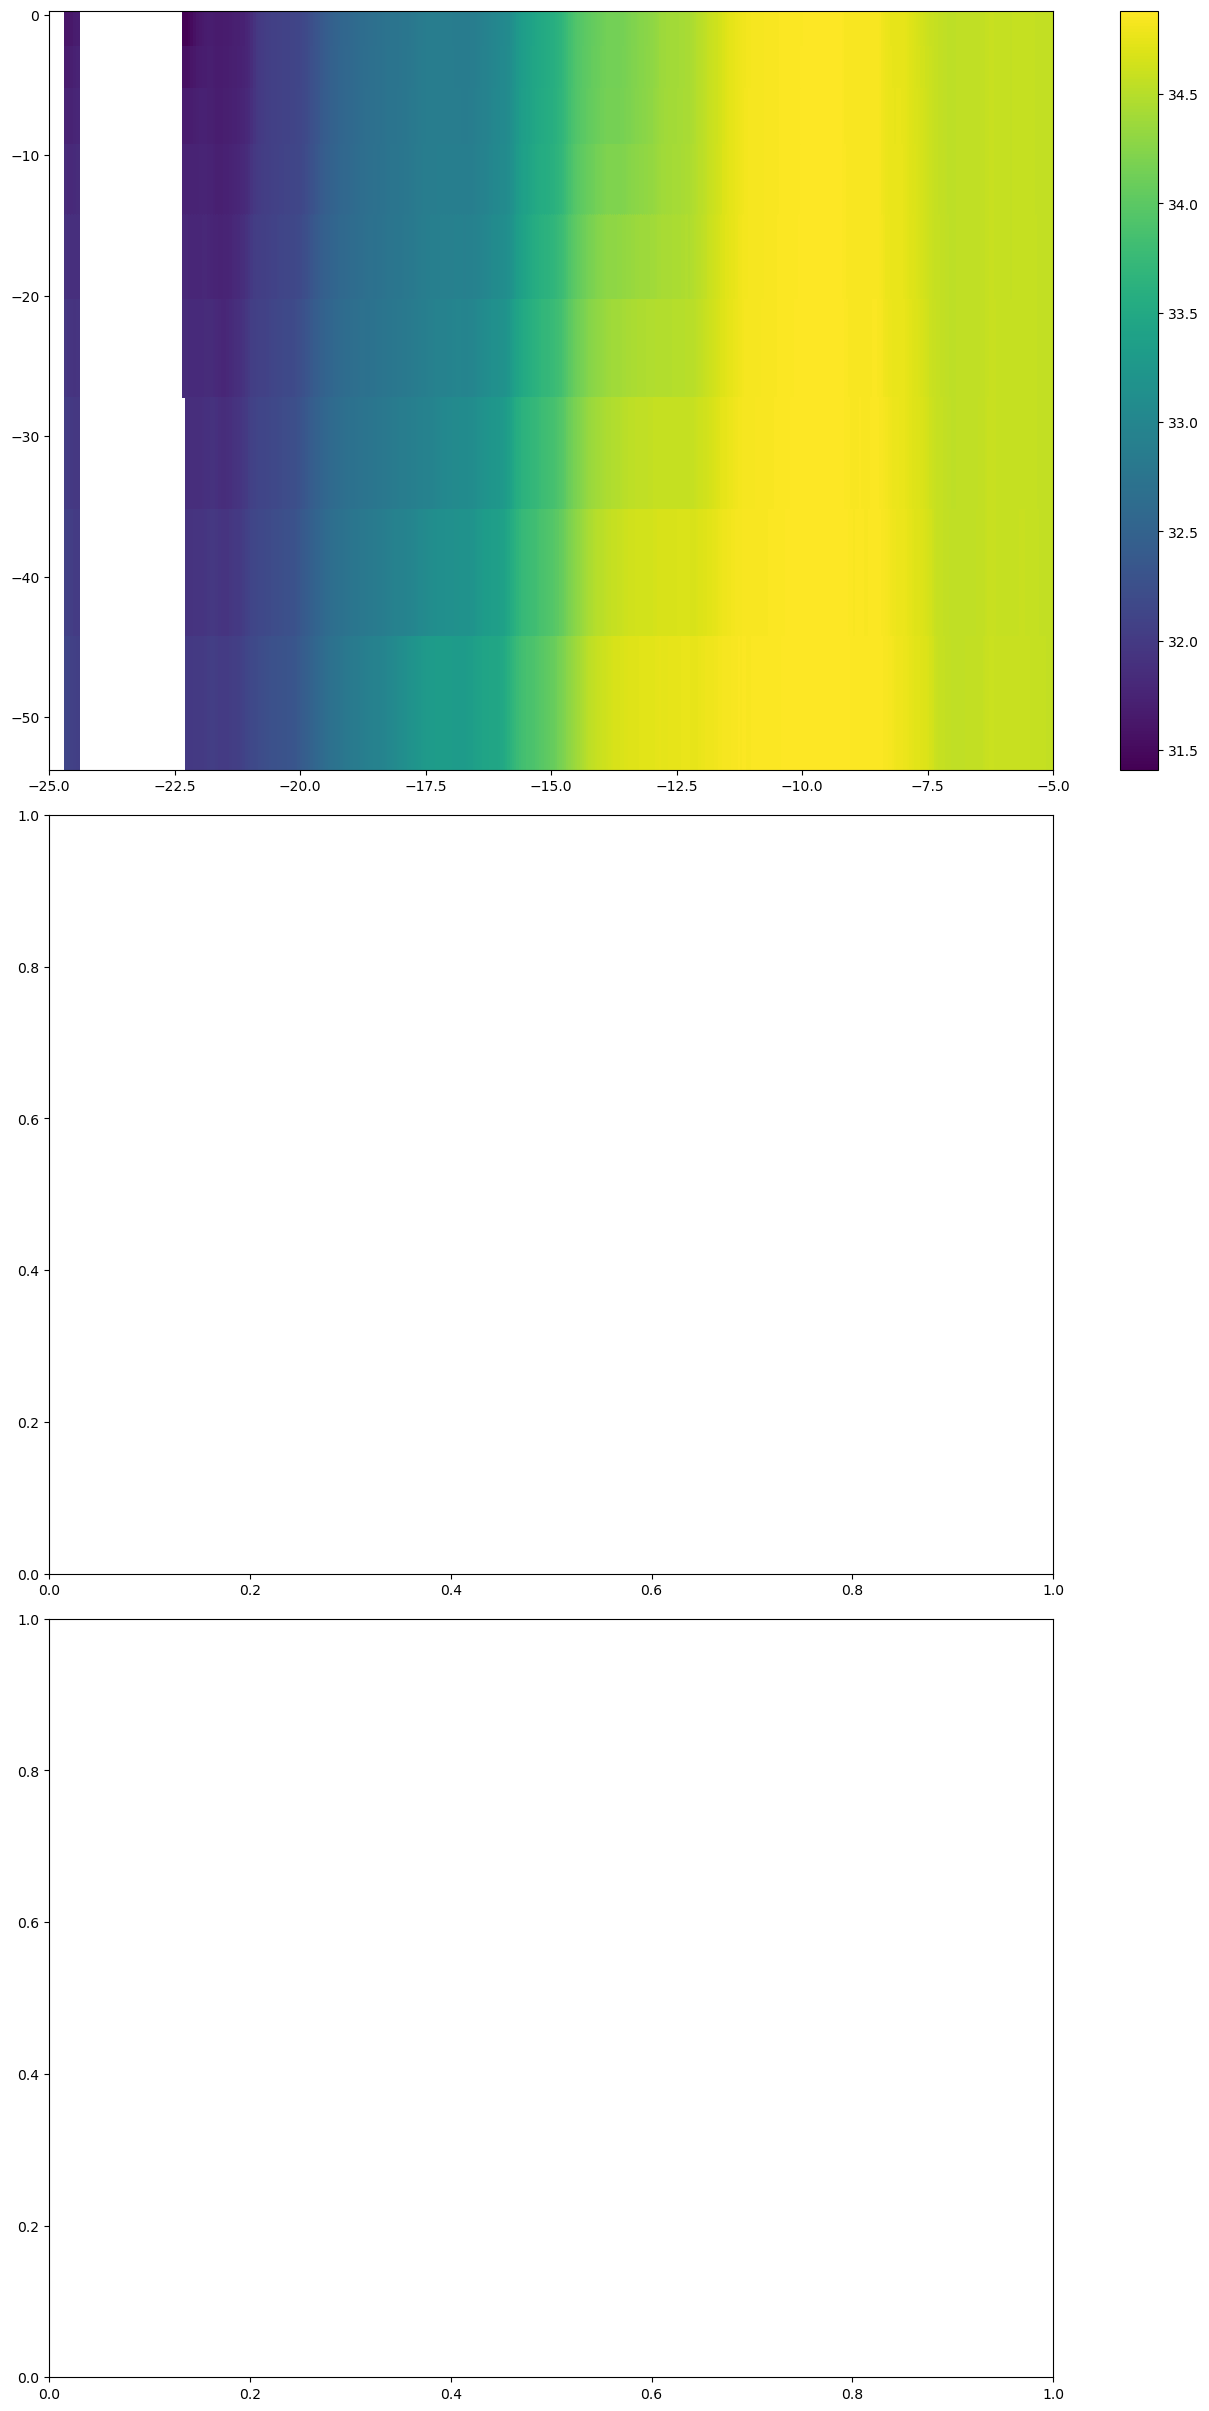

In [60]:

fig, (ax,ax2,ax3) = plt.subplots(3,1,figsize=[12,24],layout='constrained')
mesh1 = ax.pcolor(S.X,S.Z,S[0])
cbar = fig.colorbar(mesh1)

ax.set_xlim(-25,-5)